Imports

In [1]:
from google.colab import files
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, normalize
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV,KFold
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,fbeta_score

Using TensorFlow backend.


In [3]:
uploaded = files.upload()

Saving dopo_eda.csv to dopo_eda.csv


In [4]:
df = pd.read_csv("/content/dopo_eda.csv")
df.head()

,Unnamed: 0,text,label
0,0,econom recoveri nation climat pledg must desig...,0.0
1,1,difficult time it’ hard connect natur world ea...,0.0
2,2,decis postpon cop unavoid collect prioriti mus...,0.0
3,3,japan world’ fifth largest emitt greenhous gas...,0.0
4,4,countri includ naturebasedsolut climat plan nd...,0.0


In [5]:
df.drop("Unnamed: 0", axis = 1,inplace = True)
df.head()

,text,label
0,econom recoveri nation climat pledg must desig...,0.0
1,difficult time it’ hard connect natur world ea...,0.0
2,decis postpon cop unavoid collect prioriti mus...,0.0
3,japan world’ fifth largest emitt greenhous gas...,0.0
4,countri includ naturebasedsolut climat plan nd...,0.0


In [6]:
for i in range(len(df)):
    if df.label[i] != df.label[i]:
        print(df.loc[i])
        df.drop(i, inplace = True)

text     billion upon billion hard earn tax dollar spen...
label                                                  NaN
Name: 18007, dtype: object


One-Hot Encoding (Count Vectorizing)

In [9]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        param_grid = {}
        clf = svm.SVC()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


 For test size =  0.25  and number of folds  5

The score: 0.9069

Test set score : 0.907

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1823
         1.0       0.92      0.92      0.92      2679

    accuracy                           0.91      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished


 For test size =  0.25  and number of folds  10

The score: 0.9118

Test set score : 0.909

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1875
         1.0       0.92      0.92      0.92      2627

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.9min finished


 For test size =  0.25  and number of folds  15

The score: 0.9106

Test set score : 0.914

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1865
         1.0       0.93      0.92      0.93      2637

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.3min finished


 For test size =  0.25  and number of folds  20

The score: 0.9094

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1875
         1.0       0.93      0.92      0.92      2627

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


 For test size =  0.3  and number of folds  5

The score: 0.9057

Test set score : 0.912

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      2198
         1.0       0.93      0.92      0.93      3205

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min finished


 For test size =  0.3  and number of folds  10

The score: 0.9099

Test set score : 0.909

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2255
         1.0       0.93      0.92      0.92      3148

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.9min finished


 For test size =  0.3  and number of folds  15

The score: 0.9123

Test set score : 0.905

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2189
         1.0       0.93      0.91      0.92      3214

    accuracy                           0.90      5403
   macro avg       0.90      0.90      0.90      5403
weighted avg       0.91      0.90      0.90      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.9min finished


 For test size =  0.3  and number of folds  20

The score: 0.9073

Test set score : 0.915

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      2238
         1.0       0.93      0.93      0.93      3165

    accuracy                           0.92      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.92      0.92      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.8s finished


 For test size =  0.35  and number of folds  5

The score: 0.9013

Test set score : 0.912

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2556
         1.0       0.93      0.92      0.93      3747

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


 For test size =  0.35  and number of folds  10

The score: 0.907

Test set score : 0.904

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      2640
         1.0       0.92      0.91      0.92      3663

    accuracy                           0.90      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.0min finished


 For test size =  0.35  and number of folds  15

The score: 0.9076

Test set score : 0.908

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2637
         1.0       0.92      0.92      0.92      3666

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.1min finished


 For test size =  0.35  and number of folds  20

The score: 0.9064

Test set score : 0.906

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      2592
         1.0       0.92      0.92      0.92      3711

    accuracy                           0.91      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.4s finished


 For test size =  0.4  and number of folds  5

The score: 0.8973

Test set score : 0.912

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      2949
         1.0       0.93      0.92      0.92      4254

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


 For test size =  0.4  and number of folds  10

The score: 0.9024

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      3031
         1.0       0.93      0.91      0.92      4172

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.6min finished


 For test size =  0.4  and number of folds  15

The score: 0.9106

Test set score : 0.903

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      3012
         1.0       0.92      0.91      0.92      4191

    accuracy                           0.90      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished


 For test size =  0.4  and number of folds  20

The score: 0.905

Test set score : 0.907

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      2996
         1.0       0.92      0.92      0.92      4207

    accuracy                           0.91      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.91      0.91      0.91      7203




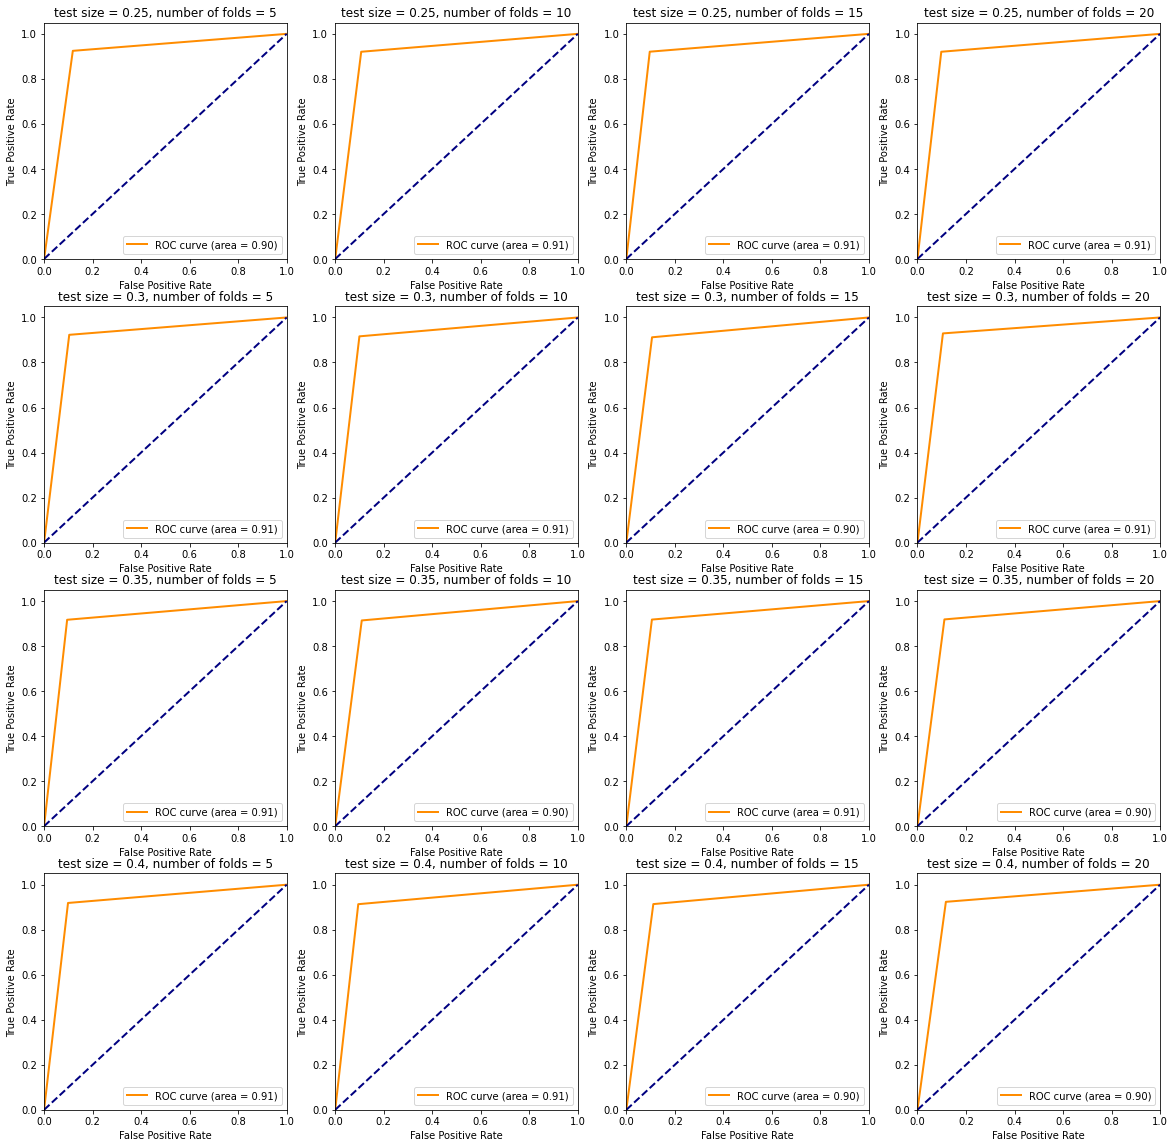

In [10]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()

TF-IDF Transform

In [11]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        
        param_grid = {}
        clf = svm.SVC()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


 For test size =  0.25  and number of folds  5

The score: 0.9126

Test set score : 0.921

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      1850
         1.0       0.94      0.92      0.93      2652

    accuracy                           0.92      4502
   macro avg       0.92      0.92      0.92      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.6min finished


 For test size =  0.25  and number of folds  10

The score: 0.9159

Test set score : 0.911

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      1900
         1.0       0.93      0.91      0.92      2602

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.0min finished


 For test size =  0.25  and number of folds  15

The score: 0.9151

Test set score : 0.918

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1838
         1.0       0.94      0.92      0.93      2664

    accuracy                           0.92      4502
   macro avg       0.91      0.92      0.92      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.9min finished


 For test size =  0.25  and number of folds  20

The score: 0.9155

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      1845
         1.0       0.94      0.91      0.93      2657

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


 For test size =  0.3  and number of folds  5

The score: 0.9133

Test set score : 0.911

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      2205
         1.0       0.93      0.92      0.92      3198

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.5min finished


 For test size =  0.3  and number of folds  10

The score: 0.9111

Test set score : 0.916

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      2172
         1.0       0.94      0.92      0.93      3231

    accuracy                           0.92      5403
   macro avg       0.91      0.92      0.91      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.3min finished


 For test size =  0.3  and number of folds  15

The score: 0.9125

Test set score : 0.919

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2218
         1.0       0.94      0.92      0.93      3185

    accuracy                           0.92      5403
   macro avg       0.92      0.92      0.92      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.6min finished


 For test size =  0.3  and number of folds  20

The score: 0.913

Test set score : 0.916

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      2272
         1.0       0.92      0.93      0.93      3131

    accuracy                           0.92      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


 For test size =  0.35  and number of folds  5

The score: 0.9114

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      2533
         1.0       0.94      0.91      0.93      3770

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished


 For test size =  0.35  and number of folds  10

The score: 0.91

Test set score : 0.916

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2599
         1.0       0.93      0.92      0.93      3704

    accuracy                           0.92      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.92      0.92      0.92      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.5min finished


 For test size =  0.35  and number of folds  15

The score: 0.9113

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2652
         1.0       0.93      0.92      0.92      3651

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.3min finished


 For test size =  0.35  and number of folds  20

The score: 0.9133

Test set score : 0.914

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2622
         1.0       0.93      0.92      0.93      3681

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.0s finished


 For test size =  0.4  and number of folds  5

The score: 0.9056

Test set score : 0.908

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2959
         1.0       0.93      0.92      0.92      4244

    accuracy                           0.91      7203
   macro avg       0.90      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


 For test size =  0.4  and number of folds  10

The score: 0.9054

Test set score : 0.909

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      2987
         1.0       0.93      0.91      0.92      4216

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.8min finished


 For test size =  0.4  and number of folds  15

The score: 0.9068

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2979
         1.0       0.93      0.92      0.93      4224

    accuracy                           0.91      7203
   macro avg       0.91      0.91      0.91      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.7min finished


 For test size =  0.4  and number of folds  20

The score: 0.9114

Test set score : 0.907

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      3006
         1.0       0.93      0.91      0.92      4197

    accuracy                           0.91      7203
   macro avg       0.90      0.91      0.90      7203
weighted avg       0.91      0.91      0.91      7203




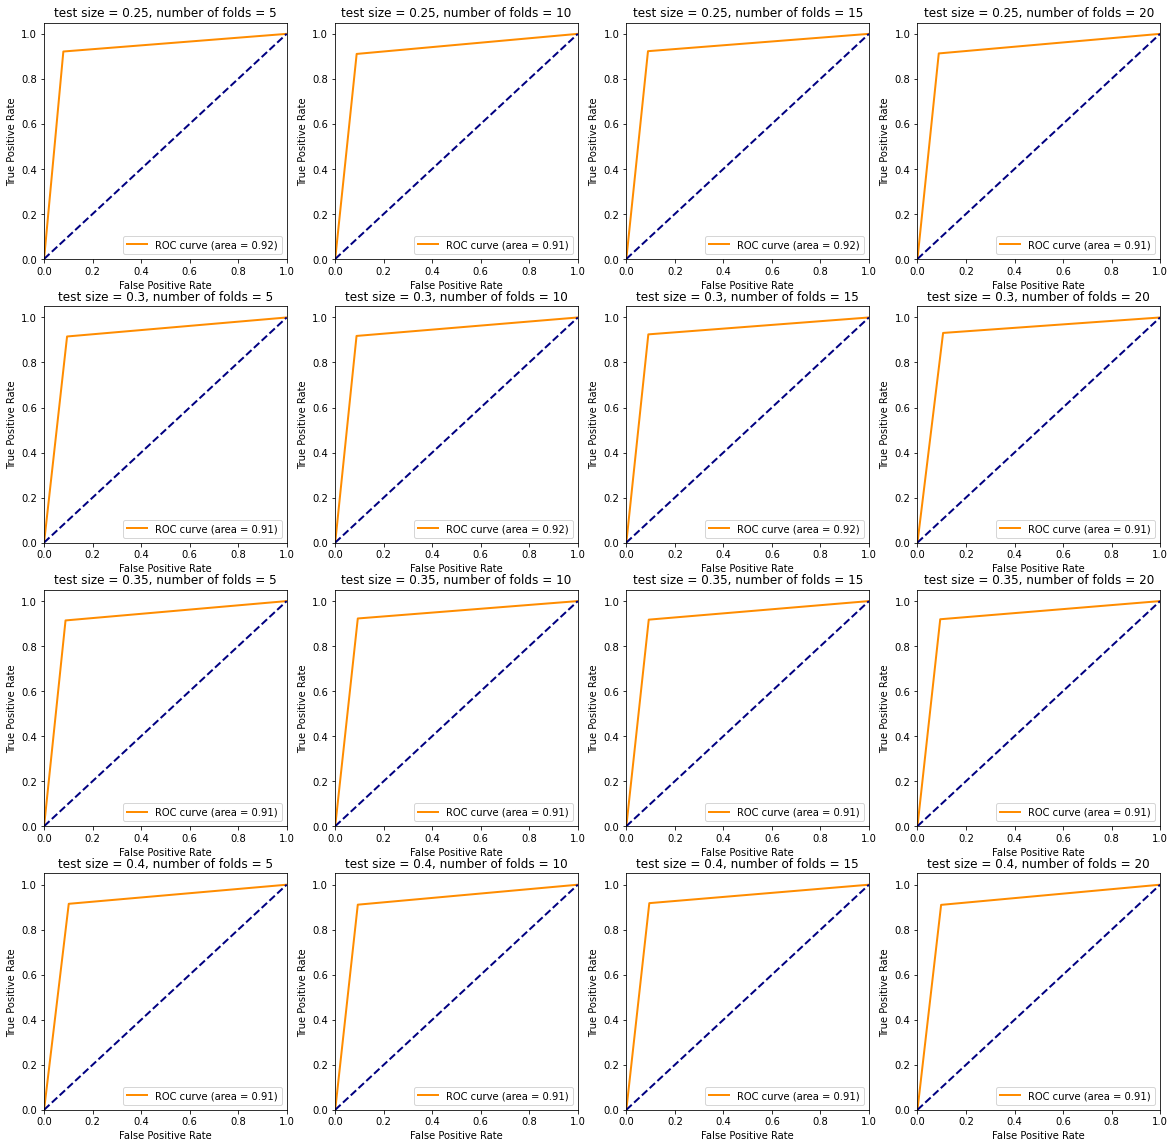

In [13]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()